In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data_lst.csv')
df.head()

,date,station,temperature,green,red,nir,swir1,swir2,lst
0,2023-08-21,4,33.1,3372,3491,3940,3871,3396,313.0
1,2023-08-21,8,32.6,2246,2173,4128,3315,2773,308.0
2,2023-08-21,16,32.0,2260,2304,4253,3144,2493,308.0
3,2023-08-21,18,32.7,1678,1650,4444,3377,2761,304.0
4,2023-08-21,24,31.9,3372,3746,4452,5077,4334,313.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


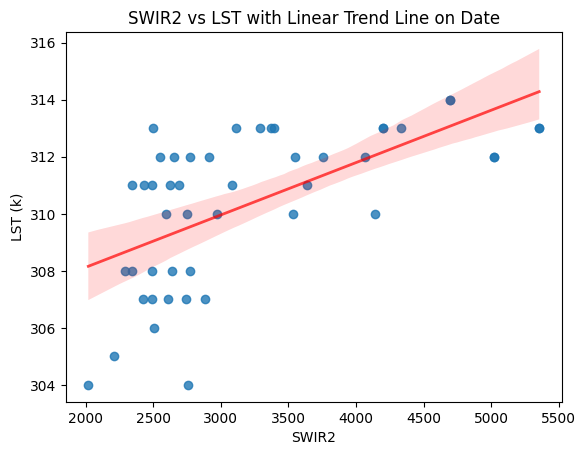

In [4]:
sns.regplot(x=df['swir2'], y=df['lst'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('SWIR2')
plt.ylabel('LST (k)')
plt.title('SWIR2 vs LST with Linear Trend Line on Date')
plt.show()

In [5]:
correlation, p_value = stats.pearsonr(df['swir2'], df['lst'])
print(f'Pearson correlation coefficient: {correlation}, p-value: {p_value}')

Pearson correlation coefficient: 0.616598420642176, p-value: 3.932762482920703e-06


In [6]:
correlation, p_value = stats.spearmanr(df['swir2'], df['lst'])
print(f'Spearman correlation coefficient: {correlation}, p-value: {p_value}')

Spearman correlation coefficient: 0.6722313821413081, p-value: 2.286901974883623e-07


In [7]:
nir = df['nir']
red = df['red']
ndvi = (nir - red) / (nir + red)

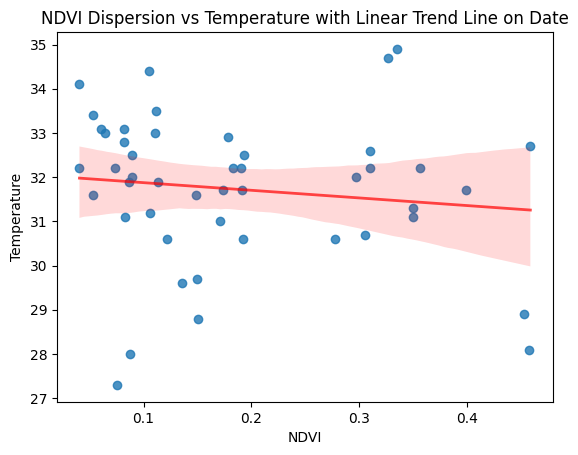

In [8]:
sns.regplot(x=ndvi, y=df['temperature'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('NDVI')
plt.ylabel('Temperature')
plt.title('NDVI Dispersion vs Temperature with Linear Trend Line on Date')
plt.show()

In [9]:
correlation, p_value = stats.spearmanr(ndvi, df['temperature'])
print(f'Spearman correlation coefficient: {correlation}, p-value: {p_value}')

Spearman correlation coefficient: -0.19957745421402825, p-value: 0.17863592208787496


## Full analysis

Instead of looking for a correlation with just the station pixels, try to use all the raster pixels.